#### Install Dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import seaborn as sns

In [2]:
# Define path for data
loan_data_path = "data/loan_data.csv"

# Read the data file

loan_data_df = pd.read_csv(loan_data_path)

In [3]:
# Display the data table
loan_data_df.head(20)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
5,1,credit_card,0.0788,125.13,11.904968,16.98,727,6120.041667,50807,51.0,0,0,0,0
6,1,debt_consolidation,0.1496,194.02,10.714418,4.00,667,3180.041667,3839,76.8,0,0,1,1
7,1,all_other,0.1114,131.22,11.002100,11.08,722,5116.000000,24220,68.6,0,0,0,1
8,1,home_improvement,0.1134,87.19,11.407565,17.25,682,3989.000000,69909,51.1,1,0,0,0
9,1,debt_consolidation,0.1221,84.12,10.203592,10.00,707,2730.041667,5630,23.0,1,0,0,0


In [4]:
# Rename the columns to make the calculations easier to complete
loan_data_update = loan_data_df.rename(columns = {'credit.policy': 'Credit_Policy',
                            'purpose': 'Loan_Type',
                            'int.rate': 'Interest_Rate',
                            'installment': 'Monthly_Installment',
                            'log.annual.inc': 'Log_Annual_Income',
                            'dti': 'DTI',
                            'fico': 'Credit_Score',
                            'days.with.cr.line': 'Days_with_Credit_Line',
                            'revol.bal': 'Revolving_Balance',
                            'revol.util': 'Revolving_LOC_Utility'})


In [5]:
loan_data = loan_data_update.drop(columns = {'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'})


In [6]:
loan_data.head(10)

,Credit_Policy,Loan_Type,Interest_Rate,Monthly_Installment,Log_Annual_Income,DTI,Credit_Score,Days_with_Credit_Line,Revolving_Balance,Revolving_LOC_Utility
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5
5,1,credit_card,0.0788,125.13,11.904968,16.98,727,6120.041667,50807,51.0
6,1,debt_consolidation,0.1496,194.02,10.714418,4.00,667,3180.041667,3839,76.8
7,1,all_other,0.1114,131.22,11.002100,11.08,722,5116.000000,24220,68.6
8,1,home_improvement,0.1134,87.19,11.407565,17.25,682,3989.000000,69909,51.1
9,1,debt_consolidation,0.1221,84.12,10.203592,10.00,707,2730.041667,5630,23.0


#### Finding the total number of loans for each loan type

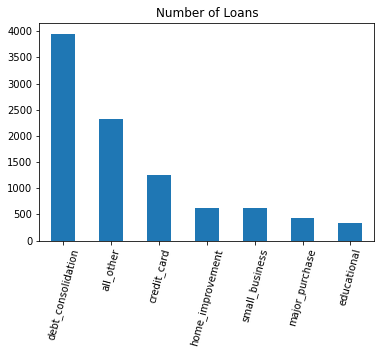

In [7]:
# Calculate the number of loans for each Loan type

loan_numbers = loan_data["Loan_Type"].value_counts()

# Create a barplot to show the loan numbers
numbers_plot = loan_numbers.plot.bar(title = "Number of Loans", rot = 75)

### Identify Credit Score Distribution

In [8]:
# Define credit score ranges
credit_scores = [0, 649, 699, 749, 850]

# Define the credit score bins
score_bins = ["Bad (<650)", "Needs Improvement (650 to 699)", "Good (700 to 749)", "Great (>=750)"]

# Sort the credit scores into their Score Bin
loan_data["Credit_Score"]= pd.cut(loan_data["Credit_Score"], credit_scores, labels= score_bins)
credit_score = loan_data.groupby("Credit_Score")



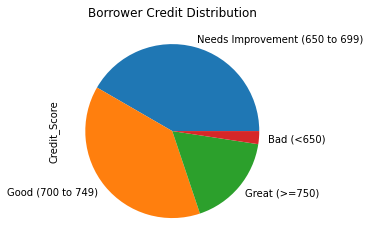

In [9]:
# Count the number of borrowers per scoring bin
borrower_credit = loan_data["Credit_Score"].value_counts()

# Create a barplot to show the loan numbers
credit_plot = borrower_credit.plot.pie(title = "Borrower Credit Distribution")


#### Finding the average length of time and average outstanding balance for each loan type

In [10]:
# Calculate the average time length for each loan based on loan type

loan_type_avg_time = loan_data.groupby(["Loan_Type"]).mean()["Days_with_Credit_Line"].sort_values()

loan_type_avg_time

Loan_Type
educational           4008.595724
all_other             4311.706153
major_purchase        4325.969108
debt_consolidation    4533.037139
credit_card           4857.005943
small_business        4892.115778
home_improvement      5201.995562
Name: Days_with_Credit_Line, dtype: float64

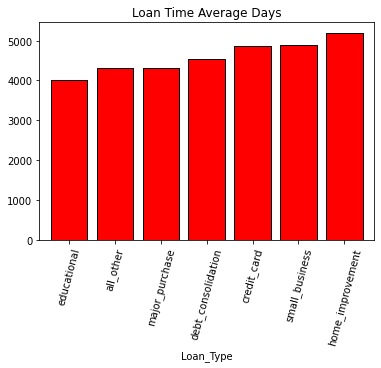

In [11]:
loan_days_plot = loan_type_avg_time.plot.bar(title = "Loan Time Average Days", width = 0.8, edgecolor = 'black',
                                                     color = "r", rot = 75)

### Finding the average outstanding balance of each loan type.

In [12]:
# Calculate the average outstanding Line of Credit Balance for each Loan Type

loan_type_avg_balance = loan_data.groupby('Loan_Type').mean()["Revolving_Balance"].sort_values()

loan_type_avg_balance

Loan_Type
major_purchase         7281.453089
educational           10828.897959
all_other             12883.039897
debt_consolidation    17146.710639
home_improvement      17328.756757
credit_card           23180.020602
small_business        27581.203554
Name: Revolving_Balance, dtype: float64

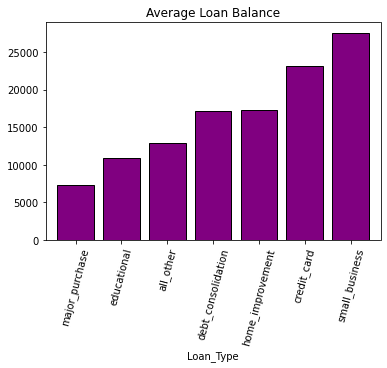

In [13]:
loan_balance_plot = loan_type_avg_balance.plot.bar(title = "Average Loan Balance", width = 0.8, edgecolor = 'black',
                                                     color = "purple", rot = 75)

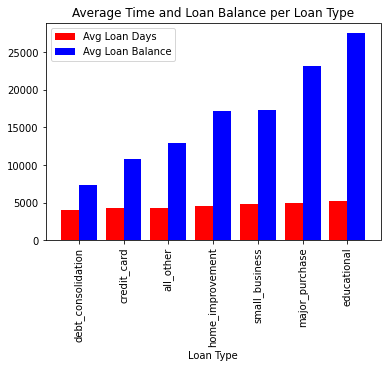

In [14]:
x = loan_data.Loan_Type.unique()
x_axis = np.arange(len(x))

bar1 = plt.bar(x_axis - 0.2, loan_type_avg_time, 0.4, color = 'r')
bar2 = plt.bar(x_axis + 0.2, loan_type_avg_balance, 0.4, color = 'b')
plt.title('Average Time and Loan Balance per Loan Type')
plt.xticks(x_axis, x, rotation = 90)
plt.legend((bar1, bar2), ('Avg Loan Days', 'Avg Loan Balance'))
plt.xlabel('Loan Type')
plt.show()

### Find Average Interest Rates Based on Loan Type

In [15]:
# Calculate the average outstanding Line of Credit Balance for each Loan Type

loan_type_avg_int_rate = loan_data.groupby('Loan_Type').mean()["Interest_Rate"].sort_values()*100

loan_type_avg_int_rate

Loan_Type
major_purchase        11.417094
all_other             11.677053
home_improvement      11.750652
credit_card           11.973819
educational           11.990729
debt_consolidation    12.659500
small_business        13.808708
Name: Interest_Rate, dtype: float64

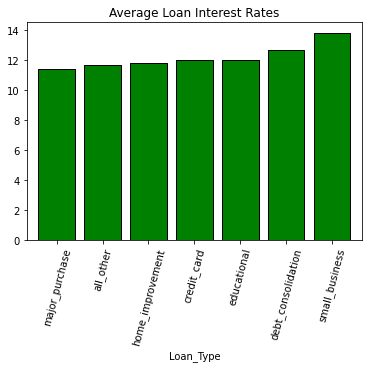

In [16]:
interest_rate_plot = loan_type_avg_int_rate.plot.bar(title = "Average Loan Interest Rates", width = 0.8, edgecolor = 'black',
                                                     color = "g", rot = 75)

#### Create multiple graphs to complete a comparitive analysis of each of the loan types

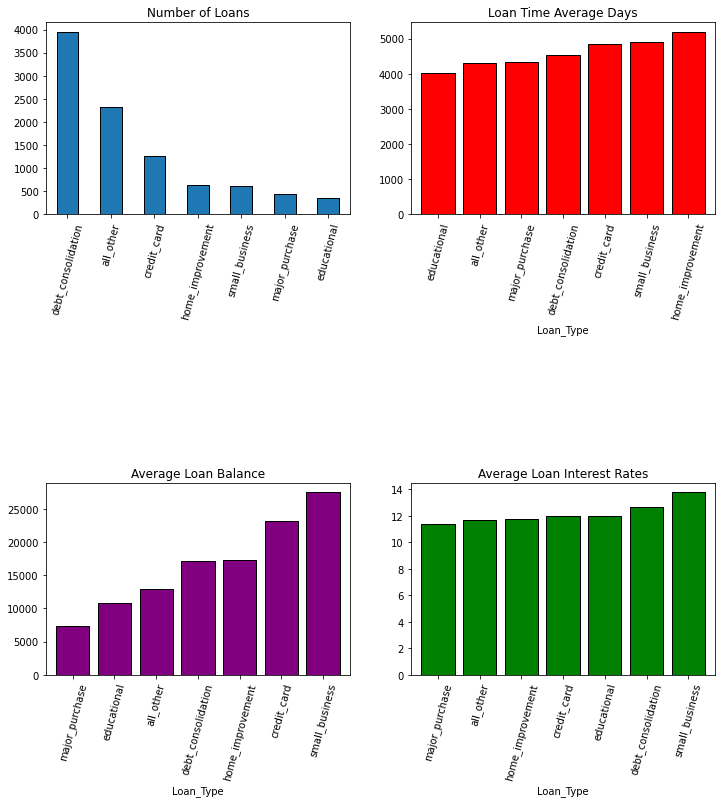

In [17]:
#plt.subplot(#tot num of rows, tot num of cols, plot number)
plt.figure(figsize = (12,12))
plt.subplot(3, 2, 1)
numbers_plot= loan_numbers.plot.bar(title = "Number of Loans", edgecolor = 'black', rot = 75)
plt.subplot(3, 2, 2)
loan_days_plot = loan_type_avg_time.plot.bar(title = "Loan Time Average Days", width = 0.8, edgecolor = 'black',
                                                     color = "r", rot = 75)
plt.subplot(3, 2, 5)
loan_balance_plot = loan_type_avg_balance.plot.bar(title = "Average Loan Balance", width = 0.8, edgecolor = 'black',
                       
                                                   color = "purple", rot = 75)
plt.subplot(3, 2, 6)
interest_rate_plot = loan_type_avg_int_rate.plot.bar(title = "Average Loan Interest Rates", width = 0.8, edgecolor = 'black',
                                                     color = "g", rot = 75)

plt.show()